
Logistic Regression
Accuracy:  0.8833333333333333
Precision: 0.84
Recall:  0.875
F1 Score:  0.8571428571428571
AUC:  0.9467592592592592

Decision Tree
Accuracy:  0.8166666666666667
Precision: 0.7241379310344828
Recall:  0.875
F1 Score:  0.7924528301886793
AUC:  0.8263888888888888

Random Forest
Accuracy:  0.8666666666666667
Precision: 0.8333333333333334
Recall:  0.8333333333333334
F1 Score:  0.8333333333333334
AUC:  0.9461805555555556

SVM
Accuracy:  0.6666666666666666
Precision: 0.6428571428571429
Recall:  0.375
F1 Score:  0.47368421052631576
AUC:  0.6805555555555556


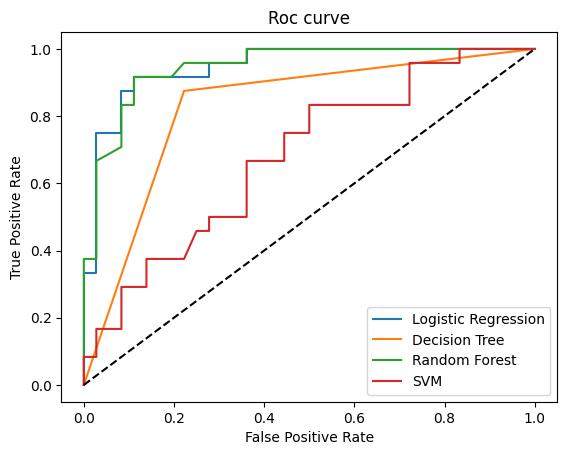

✔️ Performance evaluation metrics saved to results/evaluation_metrics.txt


In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
import os
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv("../data/heart_disease.csv")
x =df.drop('num',axis =1)
y = df['num']

y = (df['num'] > 0).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : SVC(probability=True)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1]
    print(f"\n{name}")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ",f1_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_proba))

    fpr, tpr , _ =roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label= name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Roc curve")
plt.savefig("../results/Roc_curve.png")

plt.legend()
plt.show()




with open("../results/evaluation_metrics.txt", "w") as f:
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)[:,1]
        
        f.write(f"Model: {name}\n")
        f.write(classification_report(y_test, y_pred))
        f.write(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}\n")
        f.write("-"*50 + "\n")

print("✔️ Performance evaluation metrics saved to results/evaluation_metrics.txt")